In [477]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches

from ete3 import NCBITaxa
from Bio import SeqIO
import taxoniq
import marisa_trie

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [478]:
ncbi = NCBITaxa()

In [479]:
#ncbi.update_taxonomy_database()

In [480]:
# INPUT FILES
#this_iteration = 'db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060'
#this_iteration = 'NCBI_DB_Compression-NT_0-5_scaled1000-NR_scaled1000'
#this_iteration = 'NCBI_DB_Compression-NT_0-5_scaled1000-NR_scaled1000_RUN_SEPT25' # good for NT and NR 
#this_iteration = 'db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060'

#this_iteration = 'nt_nr_2021_01_22_compressed_0.6_scaled_1000.09_25_23'
this_iteration = 'nt_nr_2021_01_22_compressed_0.7_scaled_1000.09_25_23'
current_db = 'nt'

old_taxon_counts = "./data/BASELINE/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__27091_taxon_report.csv"
new_taxon_counts = "./data/NEW/" + this_iteration + "/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.nycsm_27095_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.nycsm_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.soil_27094_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.soil_report.csv"

#old_taxon_counts = "./data/BASELINE/atcc_even_27093_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/atcc_even_report.csv"

#old_taxon_counts = "./data/BASELINE/atcc_staggered_27092_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/atcc_staggered_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.7_27101_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.7_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.buccal_27100_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.buccal_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.gut_27098_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.gut_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.hous1_27097_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.hous1_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.hous2_27096_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.hous2_report.csv"

#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.cityparks_report.csv"

# this one, with iteration = db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060...
# shows the issue with NT having extra non-genus-specific reads with bad alignment info
#old_taxon_counts = "./data/BASELINE/UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv"
#new_taxon_counts = "./data/NEW/" + this_iteration + "/UnAmbiguouslyMapped_ds.cityparks_report.csv"

#petshop
#old_taxon_counts = "./data/petshop/PCOQ_12dpf_S4_report.csv"
#new_taxon_counts = "./data/petshop/PCOQ_12dpf_S4_459131_reads_nh_report.csv"


In [481]:
old_df = pd.read_csv(old_taxon_counts)
new_df = pd.read_csv(new_taxon_counts)

old_df.head()

tax_id  tax_level  genus_tax_id                            name  \
0   12059          2         12059                     Enterovirus   
1  463676          1         12059                    Rhinovirus C   
2   11646          2         11646                      Lentivirus   
3   11676          1         11646  Human immunodeficiency virus 1   
4   11019          2         11019                      Alphavirus   

           common_name category  is_phage     agg_score  max_z_score  \
0                  NaN  viruses     False  1.296063e+09        100.0   
1                  NaN  viruses     False  1.296063e+09        100.0   
2                  NaN  viruses     False  1.287362e+09        100.0   
3                  NaN  viruses     False  1.287362e+09        100.0   
4  arboviruses group A  viruses     False  1.279746e+09        100.0   

   nt_z_score  ...  nr_contig_r  nr_percent_identity  nr_alignment_length  \
0       100.0  ...       8420.0             100.0000              2147.00   
1       100.0  ...       8420.0             100.0000              2147.00   
2        99.0  ...       8384.0              99.8997              1000.48   
3       100.0  ...       8384.0              99.8997              1000.48   
4       100.0  ...       8314.0              99.9190              2474.00   

    nr_e_value  nr_bg_mean  nr_bg_stdev nr_bg_mean_mass_normalized  \
0  10^-307.653         NaN          NaN                        NaN   
1  10^-307.653         NaN          NaN                        NaN   
2    10^-306.9         NaN          NaN                        NaN   
3    10^-306.9         NaN          NaN                        NaN   
4  10^-307.653         NaN          NaN                        NaN   

   nr_bg_stdev_mass_normalized  species_tax_ids  known_pathogen  
0                          NaN         [463676]               1  
1                          NaN              NaN               1  
2                          NaN          [11676]               0  
3                          NaN              NaN               0  
4                          NaN          [37124]               1  

[5 rows x 35 columns]

In [482]:
new_df.head()

tax_id  tax_level  genus_tax_id                          name common_name  \
0  2803850          2       2803850                Mammaliicoccus         NaN   
1    42858          1       2803850         Mammaliicoccus lentus         NaN   
2     1296          1       2803850         Mammaliicoccus sciuri         NaN   
3  2782231          2       2782231                     Kaistella         NaN   
4  1608584          1       2782231  Chryseobacterium senegalense         NaN   

   category  is_phage  agg_score  max_z_score  nt_z_score  ...  \
0  bacteria     False        NaN          NaN         NaN  ...   
1  bacteria     False        NaN          NaN         NaN  ...   
2  bacteria     False        NaN          NaN         NaN  ...   
3  bacteria     False        NaN          NaN         NaN  ...   
4  bacteria     False        NaN          NaN         NaN  ...   

   nr_alignment_length   nr_e_value  nr_bg_mean  nr_bg_stdev  \
0              41.0000   10^-15.636         NaN          NaN   
1              41.0000  10^-15.7567         NaN          NaN   
2              41.0000  10^-15.3947         NaN          NaN   
3              40.1875  10^-17.2214         NaN          NaN   
4              41.5000  10^-17.3644         NaN          NaN   

   nr_bg_mean_mass_normalized  nr_bg_stdev_mass_normalized  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                         NaN                          NaN   
4                         NaN                          NaN   

                     species_tax_ids  known_pathogen  lcrp_pathogen  \
0                      [42858, 1296]               0              0   
1                                NaN               0              0   
2                                NaN               0              0   
3  [1608584, 421525, 266748, 232216]               0              0   
4                                NaN               0              0   

   divergent_pathogen  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 37 columns]

In [483]:
old_df.columns

Index(['tax_id', 'tax_level', 'genus_tax_id', 'name', 'common_name',
       'category', 'is_phage', 'agg_score', 'max_z_score', 'nt_z_score',
       'nt_rpm', 'nt_count', 'nt_contigs', 'nt_contig_r',
       'nt_percent_identity', 'nt_alignment_length', 'nt_e_value',
       'nt_bg_mean', 'nt_bg_stdev', 'nt_bg_mean_mass_normalized',
       'nt_bg_stdev_mass_normalized', 'nr_z_score', 'nr_rpm', 'nr_count',
       'nr_contigs', 'nr_contig_r', 'nr_percent_identity',
       'nr_alignment_length', 'nr_e_value', 'nr_bg_mean', 'nr_bg_stdev',
       'nr_bg_mean_mass_normalized', 'nr_bg_stdev_mass_normalized',
       'species_tax_ids', 'known_pathogen'],
      dtype='object')

In [484]:
old_df = old_df[old_df.tax_level == 1][['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm']]
new_df = new_df[new_df.tax_level == 1][['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm']]

In [485]:
all_names = new_df['name']

new_names = []
for n in all_names:
    taxid = n.split()[-1]
    try:
        taxid2name = ncbi.get_taxid_translator([taxid])
        new_names.append(taxid2name[int(taxid)])        
    except:
        new_names.append("None")
        
new_df['fixed_name'] = new_df['name'] #new_names #only needed this "new_names" functionality when we had the bug with taxon names

In [486]:
old_df.columns

Index(['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm'], dtype='object')

In [487]:
#full_df = old_df.merge(new_df, how='outer', on='tax_id', suffixes = ['_new', '_old'])
full_df = pd.merge(left = old_df, right = new_df, how='outer', on='tax_id', suffixes = ['_old', '_new'])
#full_df = old_df.join(new_df, how='outer', on='tax_id', lsuffix = '_old', rsuffix = '_new')
full_df.head()

tax_id                        name_old    nt_rpm_old  nt_contigs_old  \
0   463676                    Rhinovirus C  64803.127790             1.0   
1    11676  Human immunodeficiency virus 1  64687.682788             1.0   
2    37124               Chikungunya virus  63987.316442             1.0   
3    11041                   Rubella virus  60108.364375             1.0   
4  1117645       Elizabethkingia anophelis  64056.583444            59.0   

     nr_rpm_old                        name_new    nt_rpm_new  nt_contigs_new  \
0  64803.127790                    Rhinovirus C  64803.127790             1.0   
1  64695.379121  Human immunodeficiency virus 1  64672.290121             1.0   
2  63987.316442               Chikungunya virus  63987.316442             1.0   
3  60108.364375                   Rubella virus  60108.364375             1.0   
4  53043.130253       Elizabethkingia anophelis  63964.227442            59.0   

     nr_rpm_new                      fixed_name  
0  64803.127790                    Rhinovirus C  
1  64695.379121  Human immunodeficiency virus 1  
2  63987.316442               Chikungunya virus  
3  60108.364375                   Rubella virus  
4  48356.063172       Elizabethkingia anophelis

In [488]:
full_df.dropna(subset=[(current_db+'_rpm_old'), (current_db+'_rpm_new')], how='all', inplace=True)
full_df['log_'+current_db+'_rpm_old'] = np.log(full_df[current_db+'_rpm_old'] + 1)
full_df['log_'+current_db+'_rpm_new'] = np.log(full_df[current_db+'_rpm_new'] + 1)

full_df.sort_values(by=current_db+'_rpm_old', ascending = False, inplace=True)
full_df.head()

tax_id                        name_old    nt_rpm_old  nt_contigs_old  \
103  1922926          Hubei mosquito virus 2  65311.085799             3.0   
180      573           Klebsiella pneumoniae  65180.248130            52.0   
0     463676                    Rhinovirus C  64803.127790             1.0   
1      11676  Human immunodeficiency virus 1  64687.682788             1.0   
4    1117645       Elizabethkingia anophelis  64056.583444            59.0   

       nr_rpm_old                        name_new    nt_rpm_new  \
103  44977.372780          Hubei mosquito virus 2  65311.085799   
180  57029.830989           Klebsiella pneumoniae  64756.949789   
0    64803.127790                    Rhinovirus C  64803.127790   
1    64695.379121  Human immunodeficiency virus 1  64672.290121   
4    53043.130253       Elizabethkingia anophelis  63964.227442   

     nt_contigs_new    nr_rpm_new                      fixed_name  \
103             3.0  44977.372780          Hubei mosquito virus 2   
180            50.0  56621.925315           Klebsiella pneumoniae   
0               1.0  64803.127790                    Rhinovirus C   
1               1.0  64695.379121  Human immunodeficiency virus 1   
4              59.0  48356.063172       Elizabethkingia anophelis   

     log_nt_rpm_old  log_nt_rpm_new  
103       11.086932       11.086932  
180       11.084927       11.078412  
0         11.079125       11.079125  
1         11.077342       11.077104  
4         11.067538       11.066095

In [489]:
full_df.fillna(0, inplace=True)
full_df['diff'] = full_df[current_db+'_rpm_old'] - full_df[current_db+'_rpm_new']
full_df['max_' + current_db + '_rpm'] = full_df[[current_db+'_rpm_old', current_db+'_rpm_new']].max(axis=1)
full_df['perc_diff'] = full_df['diff']/full_df['max_' + current_db+ '_rpm']

full_df.sort_values(by='diff', inplace=True)
top_diffs = full_df.head(5)
bottom_diffs = full_df.tail(5)

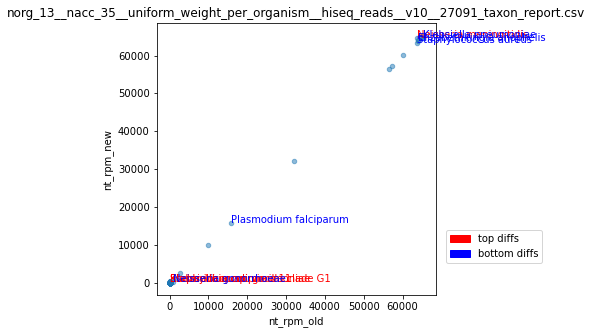

In [490]:
full_df.plot(kind='scatter', x = current_db + '_rpm_old', y = current_db+'_rpm_new', alpha = .5, figsize=(5,5))
plt.title(old_taxon_counts.split('/')[-1])
for i in top_diffs.index:
    plt.text(x = top_diffs.loc[i][current_db +'_rpm_old'], y = top_diffs.loc[i][current_db + '_rpm_new'], s = top_diffs.loc[i]['name_new'], color='red') #'fixed_name'
for i in bottom_diffs.index:
    plt.text(x = bottom_diffs.loc[i][current_db + '_rpm_old'], y = bottom_diffs.loc[i][current_db + '_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color = 'blue')#, rotation=90)
    
patches = [mpatches.Patch(color='red', label='top diffs'), mpatches.Patch(color='blue', label='bottom diffs')]
plt.legend(handles=patches, loc='lower right', bbox_to_anchor=(1.4, .1))
    
#full_df.plot(kind='scatter', x = 'nt_rpm_old', y = 'nt_rpm_new', alpha = .5, figsize=(5,5))
#for i in top_diffs.index:
#    plt.text(x = top_diffs.loc[i]['nt_rpm_old'], y = top_diffs.loc[i]['nt_rpm_new'], s = top_diffs.loc[i]['fixed_name'], color = 'red')
#for i in bottom_diffs.index:
#    plt.text(x = bottom_diffs.loc[i]['nt_rpm_old'], y = bottom_diffs.loc[i]['nt_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color = 'blue')

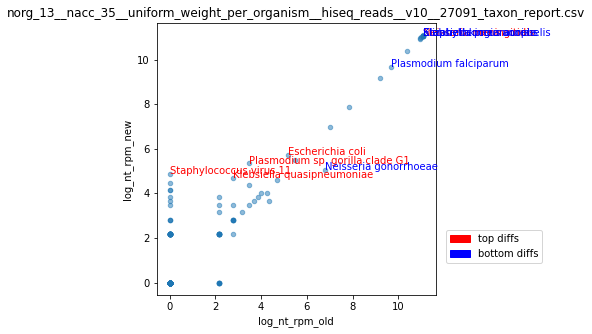

In [491]:
full_df.plot(kind='scatter', x = 'log_' +  current_db +'_rpm_old', y = 'log_' + current_db + '_rpm_new', alpha = .5, figsize=(5,5))
plt.title(old_taxon_counts.split('/')[-1])
for i in top_diffs.index:
    plt.text(x = top_diffs.loc[i]['log_' + current_db + '_rpm_old'], y = top_diffs.loc[i]['log_' +  current_db+ '_rpm_new'], s = top_diffs.loc[i]['name_new'], color='red') #'fixed_name'
for i in bottom_diffs.index:
    plt.text(x = bottom_diffs.loc[i]['log_' + current_db + '_rpm_old'], y = bottom_diffs.loc[i]['log_' + current_db + '_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color='blue')
    
plt.legend(handles=patches, loc='lower right', bbox_to_anchor=(1.4, .1))

#full_df.plot(kind='scatter', x = 'log_nt_rpm_old', y = 'log_nt_rpm_new', alpha = .5, figsize=(5,5))
#for i in top_diffs.index:
#    plt.text(x = top_diffs.loc[i]['log_nt_rpm_old'], y = top_diffs.loc[i]['log_nt_rpm_new'], s = top_diffs.loc[i]['fixed_name'], color='red') #'fixed_name'
#for i in bottom_diffs.index:
#    plt.text(x = bottom_diffs.loc[i]['log_nt_rpm_old'], y = bottom_diffs.loc[i]['log_nt_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color='blue')

In [492]:
top_diffs

tax_id                         name_old    nt_rpm_old  nt_contigs_old  \
111      487           Neisseria meningitidis  63802.604439           220.0   
92    880534  Plasmodium sp. gorilla clade G1     30.785334             0.0   
501    12360                                0      0.000000             0.0   
475      562                 Escherichia coli    177.015670             0.0   
195  1463165       Klebsiella quasipneumoniae     15.392667             0.0   

       nr_rpm_old                         name_new    nt_rpm_new  \
111  55051.873288           Neisseria meningitidis  64564.541452   
92      61.570668  Plasmodium sp. gorilla clade G1    207.801004   
501      0.000000          Staphylococcus virus 11    130.837669   
475   2208.847705                 Escherichia coli    300.157005   
195    684.973679       Klebsiella quasipneumoniae    107.748669   

     nt_contigs_new    nr_rpm_new                       fixed_name  \
111           220.0  51942.554567           Neisseria meningitidis   
92              0.0     92.356002  Plasmodium sp. gorilla clade G1   
501             0.0      0.000000          Staphylococcus virus 11   
475             0.0   2162.669704                 Escherichia coli   
195             1.0    754.240680       Klebsiella quasipneumoniae   

     log_nt_rpm_old  log_nt_rpm_new        diff    max_nt_rpm  perc_diff  
111       11.063565       11.075436 -761.937013  64564.541452  -0.011801  
92         3.459005        5.341382 -177.015670    207.801004  -0.851852  
501        0.000000        4.881571 -130.837669    130.837669  -1.000000  
475        5.181872        5.707632 -123.141335    300.157005  -0.410256  
195        2.796834        4.689039  -92.356002    107.748669  -0.857143

In [493]:
bottom_diffs

tax_id                   name_old    nt_rpm_old  nt_contigs_old  \
4    1117645  Elizabethkingia anophelis  64056.583444            59.0   
87      5833      Plasmodium falciparum  15946.802943             5.0   
138     1280      Staphylococcus aureus  63610.196103           115.0   
180      573      Klebsiella pneumoniae  65180.248130            52.0   
112      485      Neisseria gonorrhoeae    892.774682             1.0   

       nr_rpm_old                   name_new    nt_rpm_new  nt_contigs_new  \
4    53043.130253  Elizabethkingia anophelis  63964.227442            59.0   
87   11482.929532      Plasmodium falciparum  15677.431272             5.0   
138  56891.296986      Staphylococcus aureus  63286.950097           115.0   
180  57029.830989      Klebsiella pneumoniae  64756.949789            50.0   
112   4348.428409      Neisseria gonorrhoeae    153.926669             2.0   

       nr_rpm_new                 fixed_name  log_nt_rpm_old  log_nt_rpm_new  \
4    48356.063172  Elizabethkingia anophelis       11.067538       11.066095   
87   11567.589201      Plasmodium falciparum        9.677076        9.660041   
138  56852.815319      Staphylococcus aureus       11.060545       11.055450   
180  56621.925315      Klebsiella pneumoniae       11.084927       11.078412   
112   4433.088077      Neisseria gonorrhoeae        6.795454        5.042952   

           diff    max_nt_rpm  perc_diff  
4     92.356002  64056.583444   0.001442  
87   269.371671  15946.802943   0.016892  
138  323.246006  63610.196103   0.005082  
180  423.298341  65180.248130   0.006494  
112  738.848013    892.774682   0.827586

In [494]:
new_organisms_df = full_df[full_df.nt_rpm_old == 0]
new_organisms_df.sort_values(by=current_db + '_rpm_new', ascending = False, inplace=True)
new_organisms_df

/Users/katrina.kalantar/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


tax_id                       name_old  nt_rpm_old  nt_contigs_old  \
501    12360                              0         0.0             0.0   
88      5854          Plasmodium reichenowi         0.0             0.0   
243  1493872  Chryseobacterium shandongense         0.0             0.0   
504   186153                              0         0.0             0.0   
192   244366           Klebsiella variicola         0.0             0.0   
..       ...                            ...         ...             ...   
233  1813611     Chryseobacterium cucumeris         0.0             0.0   
236   558152        Chryseobacterium piperi         0.0             0.0   
244  2015076   Chryseobacterium sp. T16E-39         0.0             0.0   
246  1141221     Chryseobacterium taihuense         0.0             0.0   
408   364733            Endocarpon pusillum         0.0             0.0   

     nr_rpm_old                       name_new  nt_rpm_new  nt_contigs_new  \
501    0.000000        Staphylococcus virus 11  130.837669             0.0   
88   523.350676          Plasmodium reichenowi   84.659668             0.0   
243    7.696333  Chryseobacterium shandongense   61.570668             0.0   
504    0.000000        Staphylococcus virus 13   61.570668             0.0   
192  669.581012           Klebsiella variicola   46.178001             1.0   
..          ...                            ...         ...             ...   
233   15.392667     Chryseobacterium cucumeris    0.000000             0.0   
236    7.696333                              0    0.000000             0.0   
244    7.696333   Chryseobacterium sp. T16E-39    0.000000             0.0   
246    7.696333                              0    0.000000             0.0   
408    7.696333            Endocarpon pusillum    0.000000             0.0   

     nr_rpm_new                     fixed_name  log_nt_rpm_old  \
501    0.000000        Staphylococcus virus 11             0.0   
88   392.513007          Plasmodium reichenowi             0.0   
243   15.392667  Chryseobacterium shandongense             0.0   
504    0.000000        Staphylococcus virus 13             0.0   
192  869.685682           Klebsiella variicola             0.0   
..          ...                            ...             ...   
233    7.696333     Chryseobacterium cucumeris             0.0   
236    0.000000                              0             0.0   
244    7.696333   Chryseobacterium sp. T16E-39             0.0   
246    0.000000                              0             0.0   
408    7.696333            Endocarpon pusillum             0.0   

     log_nt_rpm_new        diff  max_nt_rpm  perc_diff  
501        4.881571 -130.837669  130.837669       -1.0  
88         4.450382  -84.659668   84.659668       -1.0  
243        4.136297  -61.570668   61.570668       -1.0  
504        4.136297  -61.570668   61.570668       -1.0  
192        3.853928  -46.178001   46.178001       -1.0  
..              ...         ...         ...        ...  
233        0.000000    0.000000    0.000000        NaN  
236        0.000000    0.000000    0.000000        NaN  
244        0.000000    0.000000    0.000000        NaN  
246        0.000000    0.000000    0.000000        NaN  
408        0.000000    0.000000    0.000000        NaN  

[248 rows x 15 columns]

In [495]:
#overall correlation!
print(stats.spearmanr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))
print(stats.pearsonr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))

SpearmanrResult(correlation=0.732472580633235, pvalue=2.3269944134590666e-52)
(0.9999813731475533, 0.0)


In [496]:
#overall correlation!
x = (stats.spearmanr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))
y = (stats.pearsonr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))


In [497]:
# correlation when removing the taxa that are new low-abundance hits -- this is higher, means that the doubling of "new taxa" (false-positives) is driving some of the spearman deviation
print(full_df.shape)
full_df2 = full_df[full_df.nt_rpm_old != 0]
print(full_df2.shape)
print(stats.spearmanr(full_df2[current_db + '_rpm_old'], full_df2[current_db + '_rpm_new']))
print(stats.pearsonr(full_df2[current_db + '_rpm_old'], full_df2[current_db + '_rpm_new']))

(304, 15)
(56, 15)
SpearmanrResult(correlation=0.9392790127071712, pvalue=9.469893264571348e-27)
(0.9999775799058326, 4.2523712232143286e-119)


% increase in total taxa
0.48214285714285715
      new  old
0      83   56
10     49   37
100    23   20
1000   16   16


Text(0.5, 1.0, 'Total Count of Hits, rPM > Threshold')

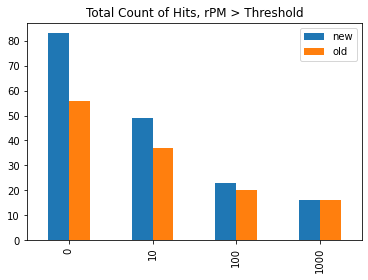

In [498]:
res = {}
for i in [0, 10, 100, 1000]:
    res[str(i)] = {}
    res[str(i)]['new'] = (full_df[current_db + '_rpm_new'] > i).sum()
    res[str(i)]['old'] = (full_df[current_db + '_rpm_old'] > i).sum()
    
    if i == 0:
        print("% increase in total taxa")
        print((res[str(i)]['new']-res[str(i)]['old'])/res[str(i)]['old'])
res_df = pd.DataFrame.from_dict(res, orient='index')
print(res_df)

res_df.plot.bar()
plt.title("Total Count of Hits, rPM > Threshold")

# Support Manual Inspection

given a file of reads
given a hitsummary from the other pipeline version (old, if reads come from new or new, if reads come from old)


In [499]:
#Enterococcus faecium reads from old sample...where did they go in new sample?
#taxon_contigs = "/Users/katrina.kalantar/Downloads/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__tax_490_contigs.fasta" 

'''old_blast_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_old.gsnap.blast.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_old.gsnap.blast.top.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_old.gsnap.hitsummary2.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_new.gsnap.blast.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_new.gsnap.blast.top.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/nycsm/unambiguouslyMapped_ds.nycsm_new.gsnap.hitsummary2.tab", sep='\t', header=None)
'''

'''old_blast_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_OLD.gsnap.blast.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_OLD.gsnap.blast.top.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_OLD.gsnap.hitsummary2.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_NEW.gsnap.blast.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_NEW.gsnap.blast.top.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/norg13/norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10_NEW.gsnap.hitsummary2.tab", sep='\t', header=None)
'''

'''taxon_reads = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.cityparks_taxon--100-hits_sept21.fasta"
old_blast_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.OLD.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.top.OLD.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/cityparks/cityparks.gsnap.hitsummary2.OLD.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.NEW.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/cityparks/cityparks.gsnap.blast.top.NEW.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/cityparks/cityparks.gsnap.hitsummary2.NEW.tab", sep='\t', header=None)
'''

# active investigation 9/25
taxon_contigs = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.nycsm_tax_1352_contigs.fasta"
taxon_reads = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.nycsm_enterococcus-faecium-hits.fasta"
old_blast_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.old.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.top.old.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/nycsm/gsnap.hitsummary2.old.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.new.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/nycsm/gsnap.blast.top.new.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/nycsm/gsnap.hitsummary2.new.tab", sep='\t', header=None)


taxon_contigs = "/Users/katrina.kalantar/Downloads/UnAmbiguouslyMapped_ds.cityparks_tax_823_contigs.fasta"
old_blast_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.old.m8", sep='\t', header=None)
old_blast_top_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.top.old.m8", sep='\t', header=None)
old_hitsummary2_df = pd.read_csv("./data/cityparks/gsnap.hitsummary2.old.tab", sep='\t', header=None)

new_blast_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.new.m8", sep='\t', header=None)
new_blast_top_m8_df = pd.read_csv("./data/cityparks/gsnap.blast.top.new.m8", sep='\t', header=None)
new_hitsummary2_df = pd.read_csv("./data/cityparks/gsnap.hitsummary2.new.tab", sep='\t', header=None)


## TRYING TO LOOK INTO THIS ISSUE: https://czi-sci.slack.com/archives/C05BEKJM893/p1693407898881269

/Users/katrina.kalantar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [500]:
list_of_contig_ids = []
for record in SeqIO.parse(taxon_contigs, "fasta"):
    contig_id = record.id.split(':')[0]
    list_of_contig_ids.append(contig_id)

In [501]:
accession_to_taxid_trie = marisa_trie.RecordTrie("Q").mmap('./references/accession2taxid.marisa')

def add_taxon_names(df):
    taxid_list = []
    for i in list(df[1]):
        try:
            taxid = accession_to_taxid_trie[i.split('.')[0]][0][0]
            taxid2name = ncbi.get_taxid_translator([taxid])
            taxid_list.append(taxid2name[int(taxid)][0:26])             
        except:
            taxid_list.append('NA')
    df['taxid'] = taxid_list
    return(df)

def print_hits(contigs, blast_m8_new, blast_m8_old):

    for c in contigs[0:10]:
        print("\n" + c)
        try:
            
            sub_df_new = blast_m8_new[blast_m8_new[0] == c][[1, 2, 3, 11]].head(10)
            sub_df_new2 = add_taxon_names(sub_df_new)
            #print(sub_df_new2)

            sub_df_old = blast_m8_old[blast_m8_old[0] == c][[1, 2, 3, 11]].head(10)
            sub_df_old2 = add_taxon_names(sub_df_old)
            #print(sub_df_old2)

            top_taxid_new = sub_df_new2.head(1).iloc[0]['taxid']
            top_taxid_old = sub_df_old2.head(1).iloc[0]['taxid']

            print(top_taxid_new)
            print(top_taxid_old)

            if(top_taxid_new == top_taxid_old):
                print("same hit")
                #print("new:")
                #print(sub_df_new2.head(5))
                #print("old:")
                #print(sub_df_old.head(5))
            else:
                print("new:")
                print(sub_df_new2.head(5))
                print("old:")
                print(sub_df_old.head(5))
            #print(sub_df2)
            
        except:
            print("had an error")


In [502]:
print_hits(list_of_contig_ids, new_blast_m8_df, old_blast_m8_df) #show contig hits in new results


NODE_214_length_1486_cov_1.790356
Parabacteroides distasonis
Parabacteroides distasonis
same hit

NODE_1148_length_653_cov_3.573579
Parabacteroides sp. CT06
Parabacteroides distasonis
new:
                1       2    3      11                     taxid
48291  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48292  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48293  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48294  CP022754.1  98.165  654  1140.0  Parabacteroides sp. CT06
48295  CP022754.1  97.561  656  1118.0  Parabacteroides sp. CT06
old:
                 1       2    3      11                       taxid
140844  CP000140.1  99.541  653  1190.0  Parabacteroides distasonis
140845  CP000140.1  99.541  653  1190.0  Parabacteroides distasonis
140846  CP000140.1  99.234  653  1177.0  Parabacteroides distasonis
140847  CP000140.1  99.234  653  1177.0  Parabacteroides distasonis
140848  CP000140.1  99.582  478   870.0  Parabacteroides distasonis

NODE_2

In [503]:
list_of_read_ids = []
for record in SeqIO.parse(taxon_reads, "fasta"):
    #print(record)
    #print(str(record))
    #print('species_nt:-100' in record)
    #print('species_nt:-100' in str(record))
    
    if('species_nt:-100' in str(record.id)):
        read_id = record.id.split(':')[-1]
        list_of_read_ids.append(read_id)
    else:
        print("NT actually isn't -100")
        print(record.id)
list_of_read_ids[0:10]

NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688463.1-82639
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688463.1-83384
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688464.1-13138
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688464.1-19912
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP006030.1:NZ_GG688464.1-22980
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:species_nr:-100:species_nt:1352:NR::NT:CP025022.1:NZ_GG688463.1-81776
NT actually isn't -100
family_nr:-300:family_nt:81852:genus_nr:-200:genus_nt:1350:specie

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15025
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15104
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15176
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15743
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-15804
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-16152
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-7544
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-7602
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-7756
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-7765
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-7768
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61246.1:NT:CP030110.1:NZ_GG688464.1-786
NT actually isn't -100
family

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-18600
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-18605
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-18611
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-18667
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-18689
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-18690
NT actually isn't -100

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-7863
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-8025
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-8067
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-8096
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-8313
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61411.1:NT:CP030110.1:NZ_GG688464.1-8336
NT actually isn't -100
family_nr:81852:family_nt:81

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61464.1:NT:CP035220.1:NZ_GG688464.1-30144
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61464.1:NT:CP035220.1:NZ_GG688464.1-30212
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61464.1:NT:CP035220.1:NZ_GG688464.1-30219
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61464.1:NT:CP035220.1:NZ_GG688464.1-30222
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61464.1:NT:CP035220.1:NZ_GG688464.1-30274
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEI61464.1:NT:CP035220.1:NZ_GG688464.1-30363
NT actually isn't -100
family_nr:81852:family

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV42321.1:NT:CP030110.1:NZ_GG688464.1-18555
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV42321.1:NT:CP030110.1:NZ_GG688464.1-18790
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV42321.1:NT:CP030110.1:NZ_GG688464.1-18973
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV42321.1:NT:CP030110.1:NZ_GG688464.1-1912
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV42321.1:NT:CP030110.1:NZ_GG688464.1-19161
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV42321.1:NT:CP030110.1:NZ_GG688464.1-19238
NT actually isn't -100


NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51522.1:NT:CP030110.1:NZ_GG688464.1-14678
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51522.1:NT:CP030110.1:NZ_GG688464.1-14735
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51522.1:NT:CP030110.1:NZ_GG688464.1-14984
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51522.1:NT:CP030110.1:NZ_GG688464.1-15100
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51522.1:NT:CP030110.1:NZ_GG688464.1-16355
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51522.1:NT:CP030110.1:NZ_GG688464.1-16577
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51563.1:NT:CP032308.1:NZ_GG688464.1-2407
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51563.1:NT:CP032308.1:NZ_GG688464.1-24869
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51563.1:NT:CP032308.1:NZ_GG688464.1-25454
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51563.1:NT:CP032308.1:NZ_GG688464.1-25468
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51563.1:NT:CP032308.1:NZ_GG688464.1-25670
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV51563.1:NT:CP032308.1:NZ_GG688464.1-25971
NT actually isn't -100


NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV56544.1:NT:CP030110.1:NZ_GG688464.1-23279
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV56544.1:NT:CP030110.1:NZ_GG688464.1-23671
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV56544.1:NT:CP030110.1:NZ_GG688464.1-24610
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV56544.1:NT:CP030110.1:NZ_GG688464.1-25547
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV56544.1:NT:CP030110.1:NZ_GG688464.1-26579
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EEV56544.1:NT:CP030110.1:NZ_GG688464.1-26752
NT actually isn't -100

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFD10603.2:NT:CP030110.1:NZ_GG688464.1-6808
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFD10603.2:NT:CP030110.1:NZ_GG688464.1-7112
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFD10603.2:NT:CP030110.1:NZ_GG688464.1-7136
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFD10603.2:NT:CP030110.1:NZ_GG688464.1-7214
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFD10603.2:NT:CP030110.1:NZ_GG688464.1-7469
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EFD10603.2:NT:CP030110.1:NZ_GG688464.1-7476
NT actually isn't -100
family_nr:81852:family_nt:81

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-10404
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-10432
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-10673
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-10987
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-11071
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-11156
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-3649
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-3732
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-4042
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-4051
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-405
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EJX43128.1:NT:CP030110.1:NZ_GG688464.1-4193
NT actually isn't -100
family

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EPI11612.1:NT:CP032308.1:NZ_GG688464.1-7906
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EPI11612.1:NT:CP032308.1:NZ_GG688464.1-7931
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EPI11612.1:NT:CP032308.1:NZ_GG688464.1-8232
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EPI11612.1:NT:CP032308.1:NZ_GG688464.1-8344
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EPI11612.1:NT:CP032308.1:NZ_GG688464.1-8433
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:EPI11612.1:NT:CP032308.1:NZ_GG688464.1-8480
NT actually isn't -100
famil

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KWX90465.1:NT:CP050650.1:NZ_GG688463.1-82270
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KWX90465.1:NT:CP050650.1:NZ_GG688463.1-83730
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KWX95188.1:NT:CP030110.1:NZ_GG688463.1-82330
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KWX95188.1:NT:CP040878.1:NZ_GG688463.1-84118
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KWY27906.1:NT:LR607349.1:NZ_GG688463.1-84227
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:KWY29885.1:NT:CP030110.1:NZ_GG688464.1-11685
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:OUK36201.1:NT:CP035220.1:NZ_GG688463.1-83498
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:OUK36201.1:NT:CP045602.1:NZ_GG688463.1-83807
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:OUK36201.1:NT:CP050255.1:NZ_GG688463.1-84345
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:OUK36201.1:NT:LR607353.1:NZ_GG688463.1-83290
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:OUK36202.1:NT:CP033376.1:NZ_GG688463.1-81801
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:OUK36202.1:NT:CP050255.1:NZ_GG688463.1-83342
NT actually isn't -100

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-17017
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-17172
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-17177
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-17194
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-17263
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:PQD80057.1:NT:CP030110.1:NZ_GG688464.1-17286
NT actually isn't -100
family_nr:81852:family

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:SJX70497.1:NT:CP030110.1:NZ_GG688464.1-23066
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:SJX70497.1:NT:CP030110.1:NZ_GG688464.1-23386
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:SJX70497.1:NT:CP030110.1:NZ_GG688464.1-23517
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:SJX70497.1:NT:CP030110.1:NZ_GG688464.1-23620
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:SJX70497.1:NT:CP030110.1:NZ_GG688464.1-23641
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:SJX70497.1:NT:CP030110.1:NZ_GG688464.1-23775
NT actually isn't -100
family_nr:81852:family

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002301544.1:NT:CP030110.1:NZ_GG688464.1-2742
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002301544.1:NT:CP030110.1:NZ_GG688464.1-27520
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002301544.1:NT:CP030110.1:NZ_GG688464.1-28130
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002301544.1:NT:CP030110.1:NZ_GG688464.1-30340
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002301544.1:NT:CP030110.1:NZ_GG688464.1-30501
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002301544.1:NT:CP030110.1:NZ_GG688464.1-3098


NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310252.1:NT:CP032308.1:NZ_GG688464.1-26667
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310252.1:NT:CP032308.1:NZ_GG688464.1-26735
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310252.1:NT:CP032308.1:NZ_GG688464.1-2674
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310252.1:NT:CP032308.1:NZ_GG688464.1-27142
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310252.1:NT:CP032308.1:NZ_GG688464.1-27189
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310252.1:NT:CP032308.1:NZ_GG688464.1-27346

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310260.1:NT:CP032308.1:NZ_GG688464.1-18128
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310260.1:NT:CP032308.1:NZ_GG688464.1-18248
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310260.1:NT:CP032308.1:NZ_GG688464.1-18281
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310260.1:NT:CP032308.1:NZ_GG688464.1-18340
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310260.1:NT:CP032308.1:NZ_GG688464.1-1835
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310260.1:NT:CP032308.1:NZ_GG688464.1-18391
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310383.1:NT:CP032308.1:NZ_GG688464.1-6761
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310383.1:NT:CP032308.1:NZ_GG688464.1-7191
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310383.1:NT:CP032308.1:NZ_GG688464.1-7451
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310383.1:NT:CP032308.1:NZ_GG688464.1-7872
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310383.1:NT:CP032308.1:NZ_GG688464.1-8709
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002310383.1:NT:CP032308.1:NZ_GG688464.1-8768
NT a

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002314218.1:NT:CP032308.1:NZ_GG688464.1-17851
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002314218.1:NT:CP032308.1:NZ_GG688464.1-18936
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002314218.1:NT:CP032308.1:NZ_GG688464.1-19177
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002314218.1:NT:CP032308.1:NZ_GG688464.1-19442
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002314218.1:NT:CP032308.1:NZ_GG688464.1-1950
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002314218.1:NT:CP032308.1:NZ_GG688464.1-19683

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002327155.1:NT:CP030110.1:NZ_GG688464.1-14131
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002327155.1:NT:CP030110.1:NZ_GG688464.1-15119
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002327155.1:NT:CP030110.1:NZ_GG688464.1-15641
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002327155.1:NT:CP030110.1:NZ_GG688464.1-15682
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002327155.1:NT:CP030110.1:NZ_GG688464.1-15833
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002327155.1:NT:CP030110.1:NZ_GG688464.1-1596

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002329024.1:NT:CP030110.1:NZ_GG688464.1-9005
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002329024.1:NT:CP030110.1:NZ_GG688464.1-9166
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002329024.1:NT:CP030110.1:NZ_GG688464.1-9252
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002329024.1:NT:CP030110.1:NZ_GG688464.1-9325
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002329024.1:NT:CP030110.1:NZ_GG688464.1-9601
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002329024.1:NT:CP030110.1:NZ_GG688464.1-9805
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-12835
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-14464
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-14944
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-15152
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-15204
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002343028.1:NT:CP030110.1:NZ_GG688464.1-15438
NT actually isn't -10

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344031.1:NT:CP027512.1:NZ_GG688464.1-3363
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344031.1:NT:CP027512.1:NZ_GG688464.1-3395
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344031.1:NT:CP027512.1:NZ_GG688464.1-3557
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344031.1:NT:CP027512.1:NZ_GG688464.1-3618
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344031.1:NT:CP027512.1:NZ_GG688464.1-3858
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344031.1:NT:CP027512.1:NZ_GG688464.1-4134
NT actually isn't -100
fami

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-11420
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-11566
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-11581
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-11663
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-11747
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-11856
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-6503
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-656
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-6626
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-6704
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-7246
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002344080.1:NT:CP030110.1:NZ_GG688464.1-7310
NT ac

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002347895.1:NT:CP030110.1:NZ_GG688464.1-22306
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002347895.1:NT:CP030110.1:NZ_GG688464.1-22367
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002347895.1:NT:CP030110.1:NZ_GG688464.1-22706
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002347895.1:NT:CP030110.1:NZ_GG688464.1-22755
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002347895.1:NT:CP030110.1:NZ_GG688464.1-22868
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_002347895.1:NT:CP030110.1:NZ_GG688464.1-22909
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-16856
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-16986
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-17019
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-17057
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-17361
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733343.1:NT:CP030110.1:NZ_GG688464.1-1737

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733389.1:NT:CP050650.1:NZ_GG688464.1-2912
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733389.1:NT:CP050650.1:NZ_GG688464.1-29282
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733389.1:NT:CP050650.1:NZ_GG688464.1-292
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733389.1:NT:CP050650.1:NZ_GG688464.1-29335
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733389.1:NT:CP050650.1:NZ_GG688464.1-29338
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_010733389.1:NT:CP050650.1:NZ_GG688464.1-29445
N

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-12755
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-1365
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-14608
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-14721
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-14862
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_025476960.1:NT:CP032308.1:NZ_GG688464.1-14933

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_053543641.1:NT:CP032308.1:NZ_GG688464.1-12379
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_053543641.1:NT:CP032308.1:NZ_GG688464.1-12536
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_053543641.1:NT:CP032308.1:NZ_GG688464.1-12644
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_053543641.1:NT:CP032308.1:NZ_GG688464.1-12846
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_053543641.1:NT:CP032308.1:NZ_GG688464.1-12847
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_053543641.1:NT:CP032308.1:NZ_GG688464.1-12979
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_061100040.1:NT:CP050648.1:NZ_GG688463.1-84138
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_061100504.1:NT:CP032308.1:NZ_GG688464.1-22409
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_061100504.1:NT:CP042834.1:NZ_GG688464.1-5828
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_061100504.1:NT:CP053704.1:NZ_GG688464.1-22938
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_061100504.1:NT:LR607355.1:NZ_GG688464.1-21546
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_061343952.1:NT:CP030110.1:NZ_GG688463.1-82537

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-4790
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-5119
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-5223
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-5325
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-5424
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_086286581.1:NT:CP030110.1:NZ_GG688464.1-5464
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_087063847.1:NT:CP030110.1:NZ_GG688464.1-16800
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_087063847.1:NT:CP030110.1:NZ_GG688464.1-16996
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_087063847.1:NT:CP030110.1:NZ_GG688464.1-17153
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_087063847.1:NT:CP030110.1:NZ_GG688464.1-17185
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_087063847.1:NT:CP030110.1:NZ_GG688464.1-1748
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_087063847.1:NT:CP030110.1:NZ_GG688464.1-17514
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6059
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6260
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6645
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6672
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6739
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_094868312.1:NT:CP030110.1:NZ_GG688464.1-6891
NT a

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_096540799.1:NT:CP030110.1:NZ_GG688464.1-6499
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_096540799.1:NT:CP030110.1:NZ_GG688464.1-6614
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_096540799.1:NT:CP030110.1:NZ_GG688464.1-6638
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_096540799.1:NT:CP030110.1:NZ_GG688464.1-6661
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_096540799.1:NT:CP030110.1:NZ_GG688464.1-6727
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_096540799.1:NT:CP030110.1:NZ_GG688464.1-6835
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771121.1:NT:CP030110.1:NZ_GG688464.1-14449
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771121.1:NT:CP030110.1:NZ_GG688464.1-14488
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771121.1:NT:CP030110.1:NZ_GG688464.1-1455
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771121.1:NT:CP030110.1:NZ_GG688464.1-14574
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771121.1:NT:CP030110.1:NZ_GG688464.1-14755
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771121.1:NT:CP030110.1:NZ_GG688464.1-15102
NT actually isn't -100

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771238.1:NT:CP030110.1:NZ_GG688464.1-16213
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771238.1:NT:CP030110.1:NZ_GG688464.1-16415
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771238.1:NT:CP030110.1:NZ_GG688464.1-16434
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771238.1:NT:CP030110.1:NZ_GG688464.1-16633
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771238.1:NT:CP030110.1:NZ_GG688464.1-16960
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104771238.1:NT:CP030110.1:NZ_GG688464.1-17040
NT actually isn't -10

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-26959
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-27217
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-2738
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-27396
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-27962
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_104885536.1:NT:CP030110.1:NZ_GG688464.1-28506
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_114635950.1:NT:CP032308.1:NZ_GG688464.1-13940
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_114635950.1:NT:CP032308.1:NZ_GG688464.1-14395
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_114635950.1:NT:CP032308.1:NZ_GG688464.1-14406
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_114635950.1:NT:CP032308.1:NZ_GG688464.1-14647
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_114635950.1:NT:CP032308.1:NZ_GG688464.1-14738
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_114635950.1:NT:CP032308.1:NZ_GG688464.1-1508

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123835049.1:NT:CP030110.1:NZ_GG688464.1-15517
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123835049.1:NT:CP030110.1:NZ_GG688464.1-15648
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123835049.1:NT:CP030110.1:NZ_GG688464.1-15692
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123835049.1:NT:CP030110.1:NZ_GG688464.1-15763
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123835049.1:NT:CP030110.1:NZ_GG688464.1-15767
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123835049.1:NT:CP030110.1:NZ_GG688464.1-1580

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123838968.1:NT:CP030110.1:NZ_GG688464.1-16902
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123838968.1:NT:CP030110.1:NZ_GG688464.1-17158
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123838968.1:NT:CP030110.1:NZ_GG688464.1-17524
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123838968.1:NT:CP030110.1:NZ_GG688464.1-17570
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123838968.1:NT:CP030110.1:NZ_GG688464.1-18045
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123838968.1:NT:CP030110.1:NZ_GG688464.1-18552
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123861051.1:NT:CP030110.1:NZ_GG688464.1-8454
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123861051.1:NT:CP030110.1:NZ_GG688464.1-8544
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123861051.1:NT:CP030110.1:NZ_GG688464.1-8732
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123861051.1:NT:CP030110.1:NZ_GG688464.1-8868
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123861051.1:NT:CP030110.1:NZ_GG688464.1-8965
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_123861051.1:NT:CP030110.1:NZ_GG688464.1-8995
NT a

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139902726.1:NT:CP030110.1:NZ_GG688464.1-13226
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139902726.1:NT:CP030110.1:NZ_GG688464.1-13499
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139902726.1:NT:CP030110.1:NZ_GG688464.1-13825
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139902726.1:NT:CP030110.1:NZ_GG688464.1-13839
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139902726.1:NT:CP030110.1:NZ_GG688464.1-13864
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139902726.1:NT:CP030110.1:NZ_GG688464.1-1403
NT actually isn't -100

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913766.1:NT:CP050650.1:NZ_GG688464.1-9953
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913892.1:NT:CP030110.1:NZ_GG688463.1-82519
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913892.1:NT:CP032308.1:NZ_GG688463.1-81889
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913892.1:NT:CP033376.1:NZ_GG688463.1-83939
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913892.1:NT:CP035220.1:NZ_GG688463.1-83887
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_139913892.1:NT:CP050648.1:NZ_GG688463.1-83043

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_142972396.1:NT:CP030110.1:NZ_GG688464.1-21932
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_142972396.1:NT:CP030110.1:NZ_GG688464.1-23118
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_142972396.1:NT:CP030110.1:NZ_GG688464.1-23656
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_142972396.1:NT:CP030110.1:NZ_GG688464.1-239
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_142972396.1:NT:CP030110.1:NZ_GG688464.1-26362
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_142972396.1:NT:CP030110.1:NZ_GG688464.1-3805
N

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_153841906.1:NT:CP030110.1:NZ_GG688464.1-9407
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_153841906.1:NT:CP030110.1:NZ_GG688464.1-9893
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_154048572.1:NT:CP033041.1:NZ_GG688463.1-81526
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_154048572.1:NT:CP050650.1:NZ_GG688463.1-84082
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_154048573.1:NT:CP006030.1:NZ_GG688464.1-6333
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_154059362.1:NT:CP030110.1:NZ_GG688463.1-81651
N

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_167779388.1:NT:CP030110.1:NZ_GG688464.1-21857
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_167779388.1:NT:CP030110.1:NZ_GG688464.1-22576
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_167779388.1:NT:CP030110.1:NZ_GG688464.1-22598
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_167779388.1:NT:CP030110.1:NZ_GG688464.1-23014
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_167779388.1:NT:CP030110.1:NZ_GG688464.1-23179
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_167779388.1:NT:CP030110.1:NZ_GG688464.1-23205
NT actually isn't -10

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-25009
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-25163
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-25534
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-25765
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-26221
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_185048141.1:NT:CP032308.1:NZ_GG688464.1-2646

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_193796855.1:NT:CP035136.1:NZ_GG688463.1-84317
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_193796906.1:NT:CP050648.1:NZ_GG688463.1-83966
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_193797054.1:NT:CP030110.1:NZ_GG688464.1-10102
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_193797054.1:NT:CP030110.1:NZ_GG688464.1-11554
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_193797054.1:NT:CP030110.1:NZ_GG688464.1-11711
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_193797054.1:NT:CP030110.1:NZ_GG688464.1-1192

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-28325
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-28348
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-28479
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-28601
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-28613
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:1352:NR:WP_195943572.1:NT:CP030110.1:NZ_GG688464.1-28622
NT actually isn't -10

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1354:species_nt:1352:NR:WP_126344363.1:NT:CP030110.1:NZ_GG688464.1-12879
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1354:species_nt:1352:NR:WP_126344363.1:NT:CP030110.1:NZ_GG688464.1-13526
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1354:species_nt:1352:NR:WP_126344363.1:NT:CP030110.1:NZ_GG688464.1-14070
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1354:species_nt:1352:NR:WP_126344363.1:NT:CP030110.1:NZ_GG688464.1-14227
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1354:species_nt:1352:NR:WP_126344363.1:NT:CP030110.1:NZ_GG688464.1-14309
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1354:species_nt:1352:NR:WP_126344363.1:NT:CP030110.1:NZ_GG688464.1-163
NT actually isn't -100


NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV51520.1:NT:CP042839.1:NZ_GG688464.1-13258
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV51520.1:NT:CP042839.1:NZ_GG688464.1-1332
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV51520.1:NT:CP042839.1:NZ_GG688464.1-13749
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV51520.1:NT:CP042839.1:NZ_GG688464.1-14353
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV51520.1:NT:CP042839.1:NZ_GG688464.1-14666
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EEV51520.1:NT:CP042839.1:NZ_GG688464.1-15306
NT ac

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EPI13482.1:NT:CP042839.1:NC_007969.1-618383
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EPI13482.1:NT:CP042839.1:NC_007969.1-650264
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EPI13482.1:NT:CP042839.1:NZ_GG688464.1-11091
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EPI13482.1:NT:CP042839.1:NZ_GG688464.1-13018
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EPI13482.1:NT:CP042839.1:NZ_GG688464.1-14653
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:EPI13482.1:NT:CP042839.1:NZ_GG688464.1-17077
NT actually isn't -100
family

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-12030
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-12332
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-12474
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-12477
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-12520
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-5870
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-5970
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-5974
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-6033
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-6193
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002310365.1:NT:CP042839.1:NZ_GG688464.1-626
NT actuall

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002320418.1:NT:CP042839.1:NZ_GG688464.1-21531
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002320418.1:NT:CP042839.1:NZ_GG688464.1-2156
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002320418.1:NT:CP042839.1:NZ_GG688464.1-21641
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002320418.1:NT:CP042839.1:NZ_GG688464.1-21848
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002320418.1:NT:CP042839.1:NZ_GG688464.1-21871
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002320418.1:NT:CP042839.1:NZ_GG688464.1-21887
NT a

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-25805
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-26042
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-26125
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-26137
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:NZ_GG688464.1-26658
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_002346297.1:NT:CP042839.1:

family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_104771175.1:NT:CP042839.1:NZ_GG688464.1-26693
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_104771175.1:NT:CP042839.1:NZ_GG688464.1-27112
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_104771175.1:NT:CP042839.1:NZ_GG688464.1-27502
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_104771175.1:NT:CP042839.1:NZ_GG688464.1-27745
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_104771175.1:NT:CP042839.1:NZ_GG688464.1-27905
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_104771175.1:NT:CP042839.1:NZ_GG688464.1-27971
NT 

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-17992
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-18154
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-18171
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-1831
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:NZ_GG688464.1-19055
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_105222918.1:NT:CP042839.1:N

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_172867973.1:NT:CP042839.1:NZ_GG688464.1-7571
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_172867973.1:NT:CP042839.1:NZ_GG688464.1-7982
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_172867973.1:NT:CP042839.1:NZ_GG688464.1-8075
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_172867973.1:NT:CP042839.1:NZ_GG688464.1-8141
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_172867973.1:NT:CP042839.1:NZ_GG688464.1-8543
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:2603296:NR:WP_172867973.1:NT:CP042839.1:NZ_GG

NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:357441:NR:WP_016853396.1:NT:CP065211.1:NZ_GG688464.1-23235
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:357441:NR:WP_016853396.1:NT:CP065211.1:NZ_GG688464.1-2422
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:357441:NR:WP_016853396.1:NT:CP065211.1:NZ_GG688464.1-24467
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:357441:NR:WP_016853396.1:NT:CP065211.1:NZ_GG688464.1-25732
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:357441:NR:WP_016853396.1:NT:CP065211.1:NZ_GG688464.1-26274
NT actually isn't -100
family_nr:81852:family_nt:81852:genus_nr:1350:genus_nt:1350:species_nr:1352:species_nt:357441:NR:WP_016853396.1:NT:CP065211.1:NZ_GG68

[]

In [504]:
list_of_read_ids

[]

In [505]:
old_hitsummary2_df[old_hitsummary2_df[0].isin(list_of_read_ids)]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Index: []

In [506]:
new_hitsummary2_df[new_hitsummary2_df[0].isin(list_of_read_ids)]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Index: []